In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from analysis.utils import module_reload
module_reload('analysis')
from analysis.import_data import import_true_reco
from analysis.plot_matplotlib import plot_hist, export_figures

from tqdm.auto import tqdm
import json

repo_dir = '/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP'

In [4]:
df = import_true_reco(file_name='compare_truejet_matchingreco.root')
zhh = df[df['is_zhh'] == 1]
zzh = df[df['is_zzh'] == 1]

data = {
    'zhh': zhh,
    'zzh': zzh
}

Using cached file from /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/compare_truejet_matchingreco.root_zhh_zzh.npy


Muon

Angles

In [5]:
df['jet1_px']

0         -14.660296
1           4.997015
2         -17.555702
3          19.019962
4         -68.732964
             ...    
100223    108.920738
100224     81.124573
100225      0.000000
100226    -27.367098
100227     17.764742
Name: jet1_px, Length: 100228, dtype: float32

In [6]:
df['jet1_px'].max()

184.44086

[4.93312392e-05 1.81752267e-02]


[-0.00016978  0.01848166]
[8.39949882e-05 1.83438183e-02]
[1.09853580e-05 1.86556448e-02]
SEPTF: A(1+2) : B(3+4)
[-6.02261458e-05  1.83284439e-02]
[4.74901731e-05 1.84997315e-02]
[0.0006194  0.02479131]
[0.00050009 0.02479721]
[0.00039004 0.02502199]
[0.00033497 0.02488596]
SEPTF: A(1+2) : B(3+4)
[0.00055974 0.02479426]
[0.00036251 0.02495398]
[-0.0007454   0.01678963]
[0.00044478 0.01626923]
[0.00016951 0.01871893]
[-4.04939377e-05  1.83372433e-02]
SEPTF: A(1+2) : B(3+4)
[-0.00015031  0.01652943]
[6.45082682e-05 1.85280848e-02]
[0.00105991 0.02411686]
[0.00052112 0.0241699 ]
[0.00057161 0.02452313]
[0.00068281 0.02521061]
SEPTF: A(1+2) : B(3+4)
[0.00079052 0.02414338]
[0.00062721 0.02486687]


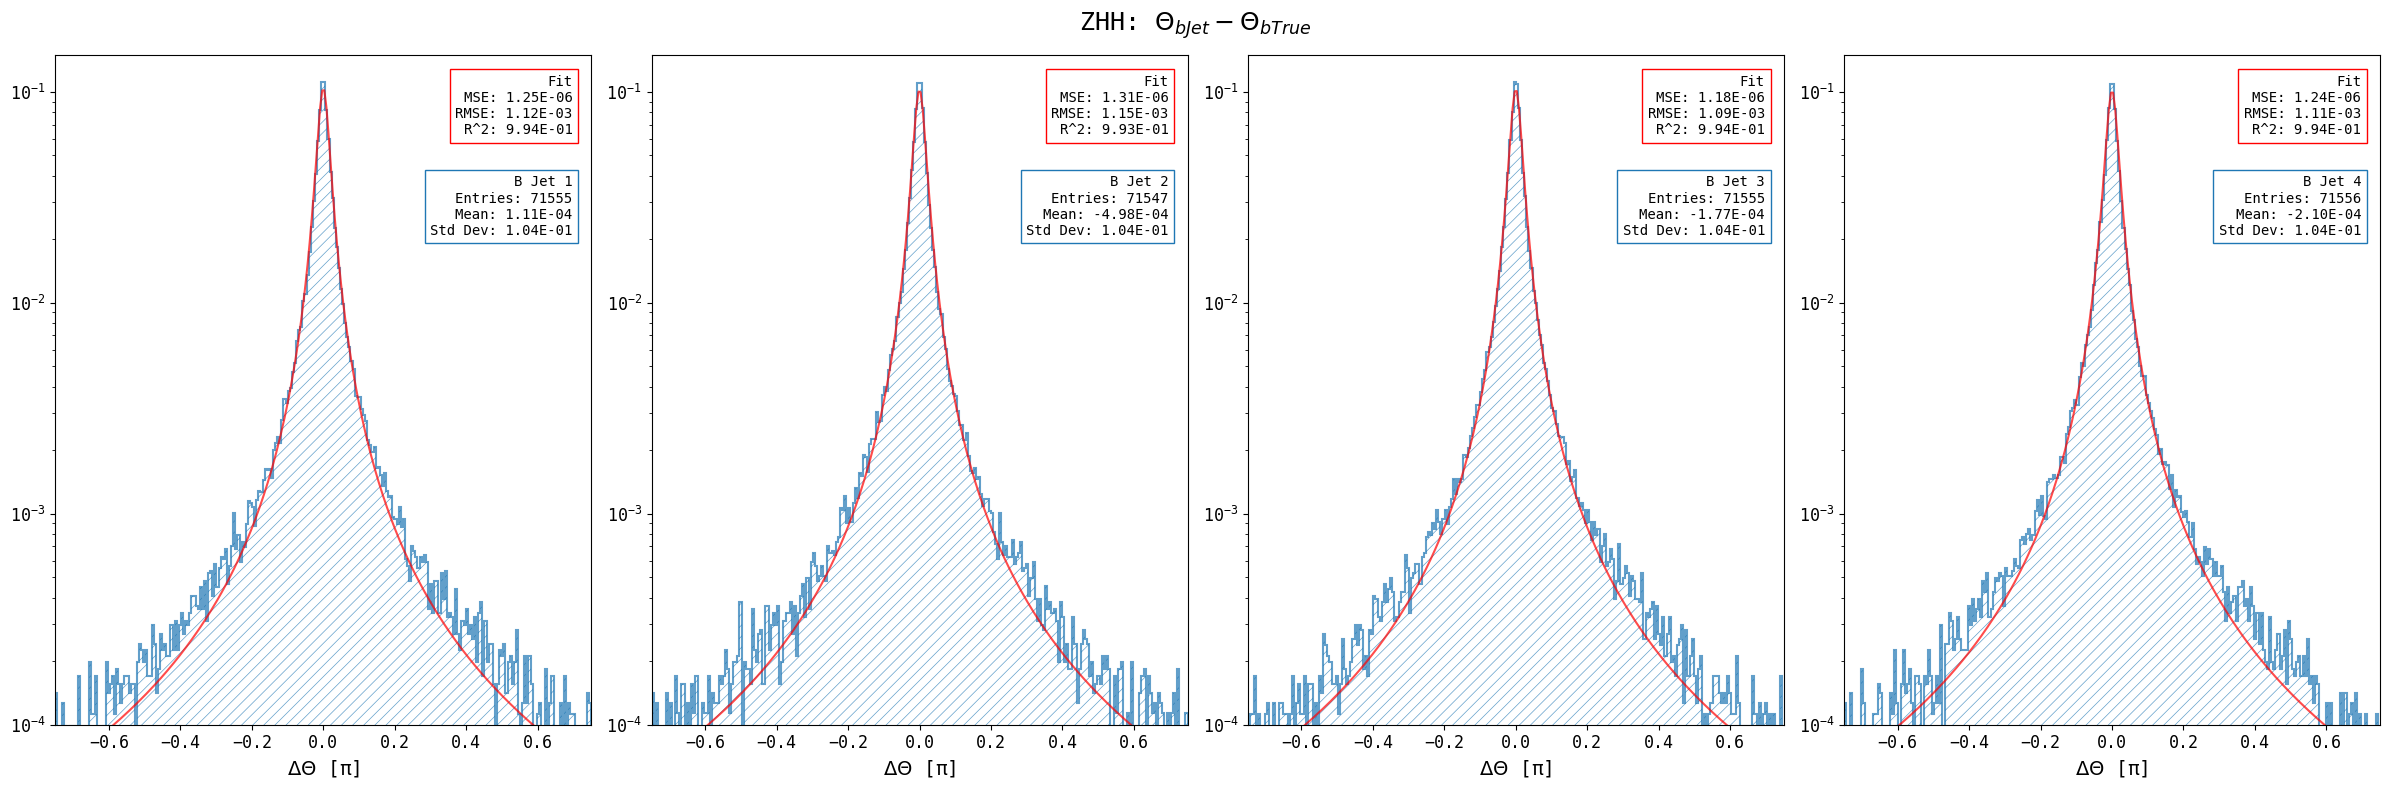

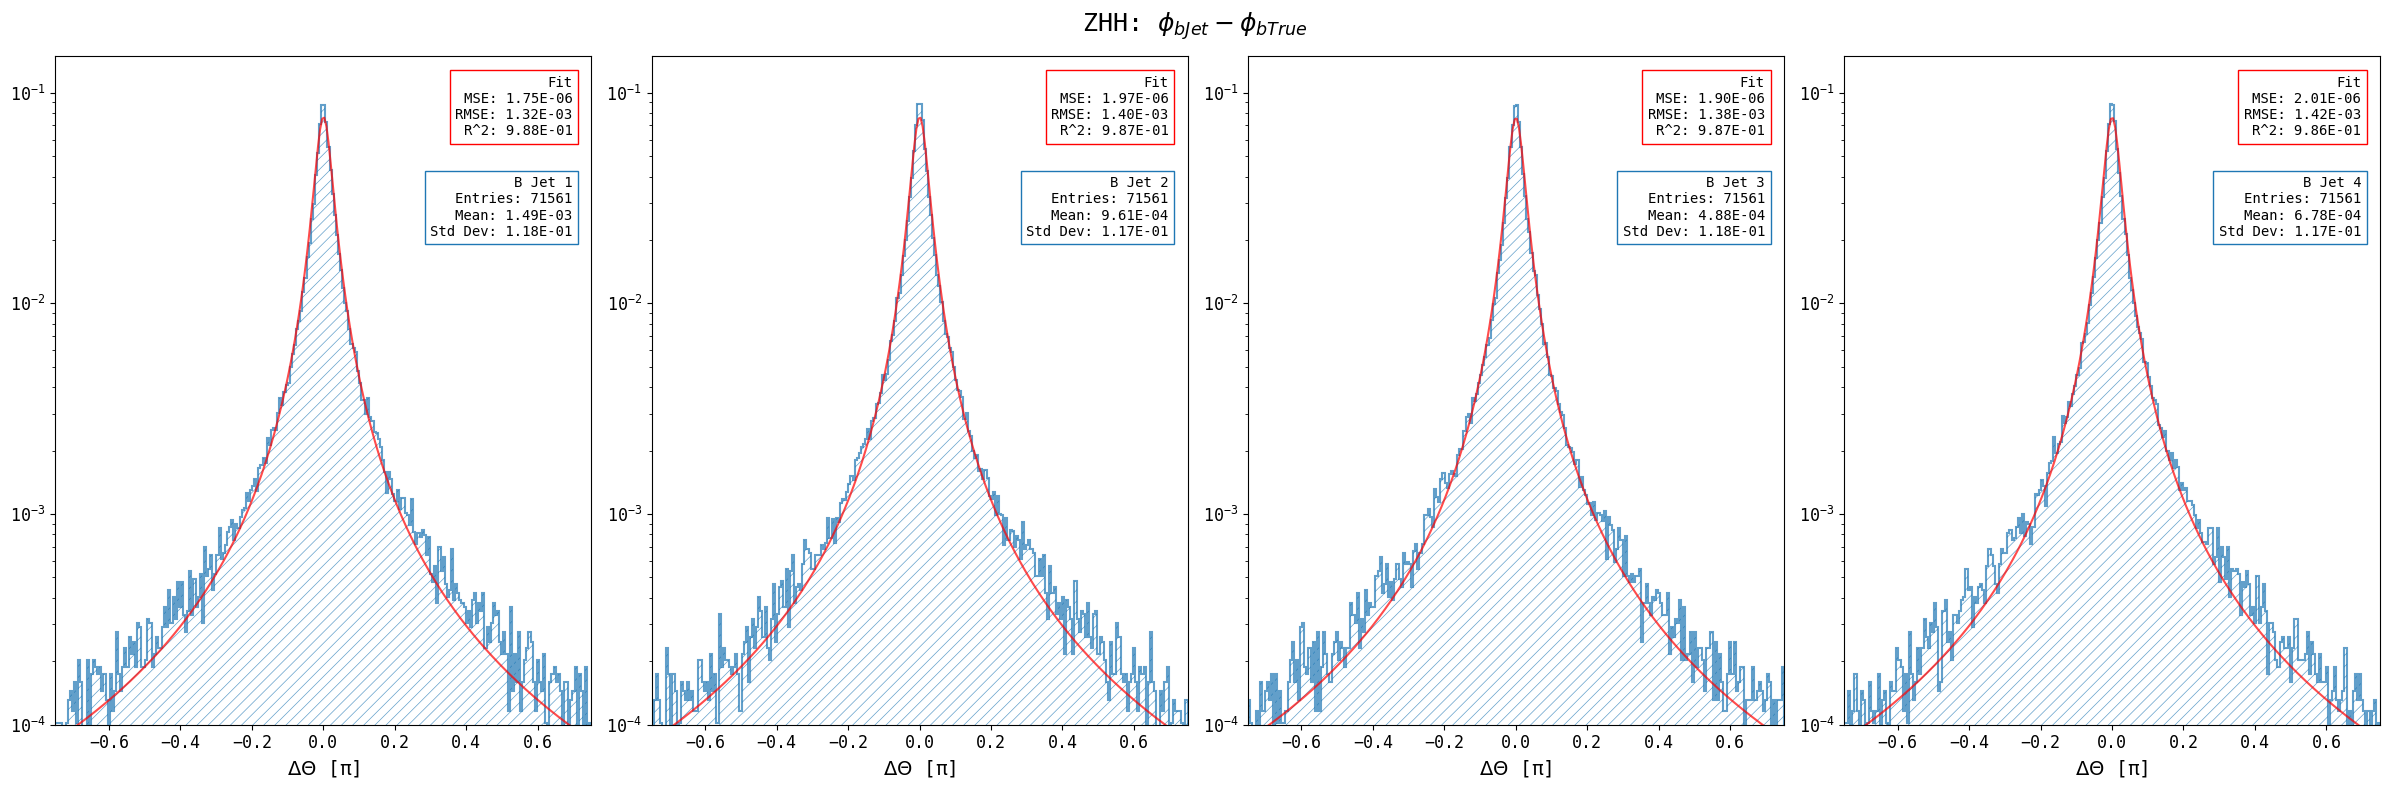

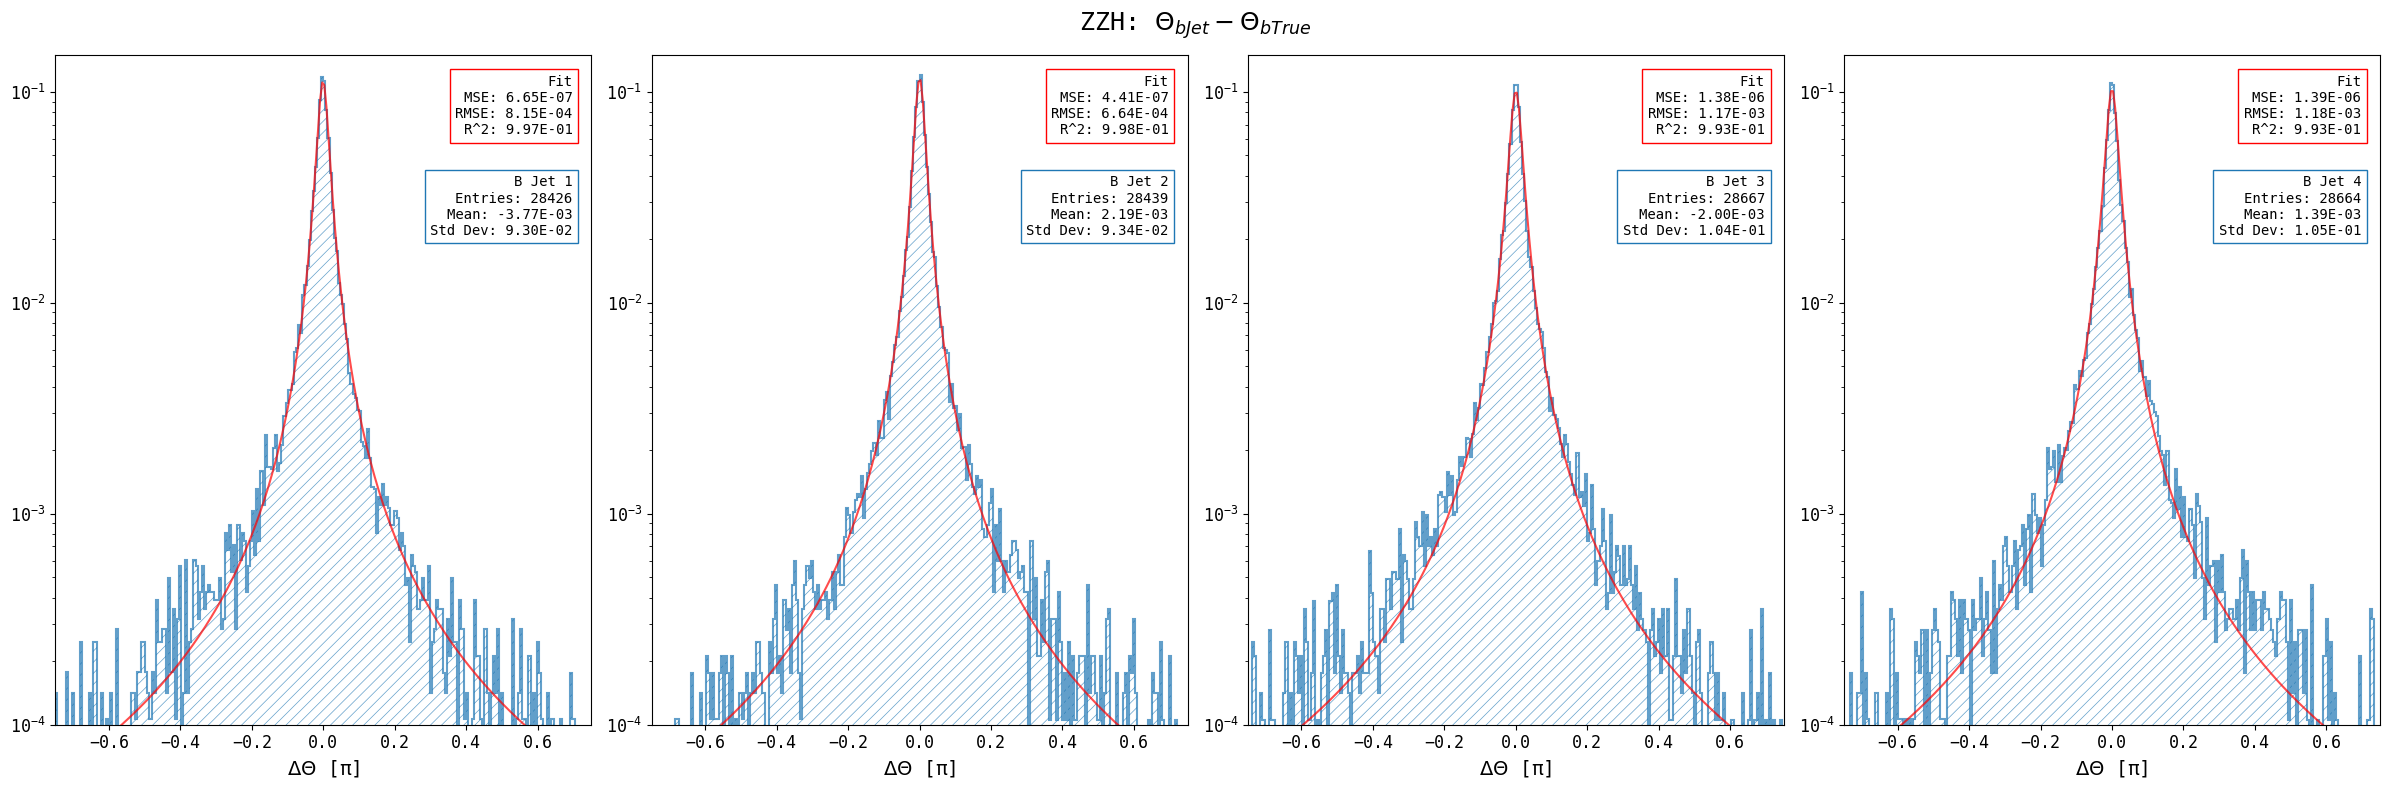

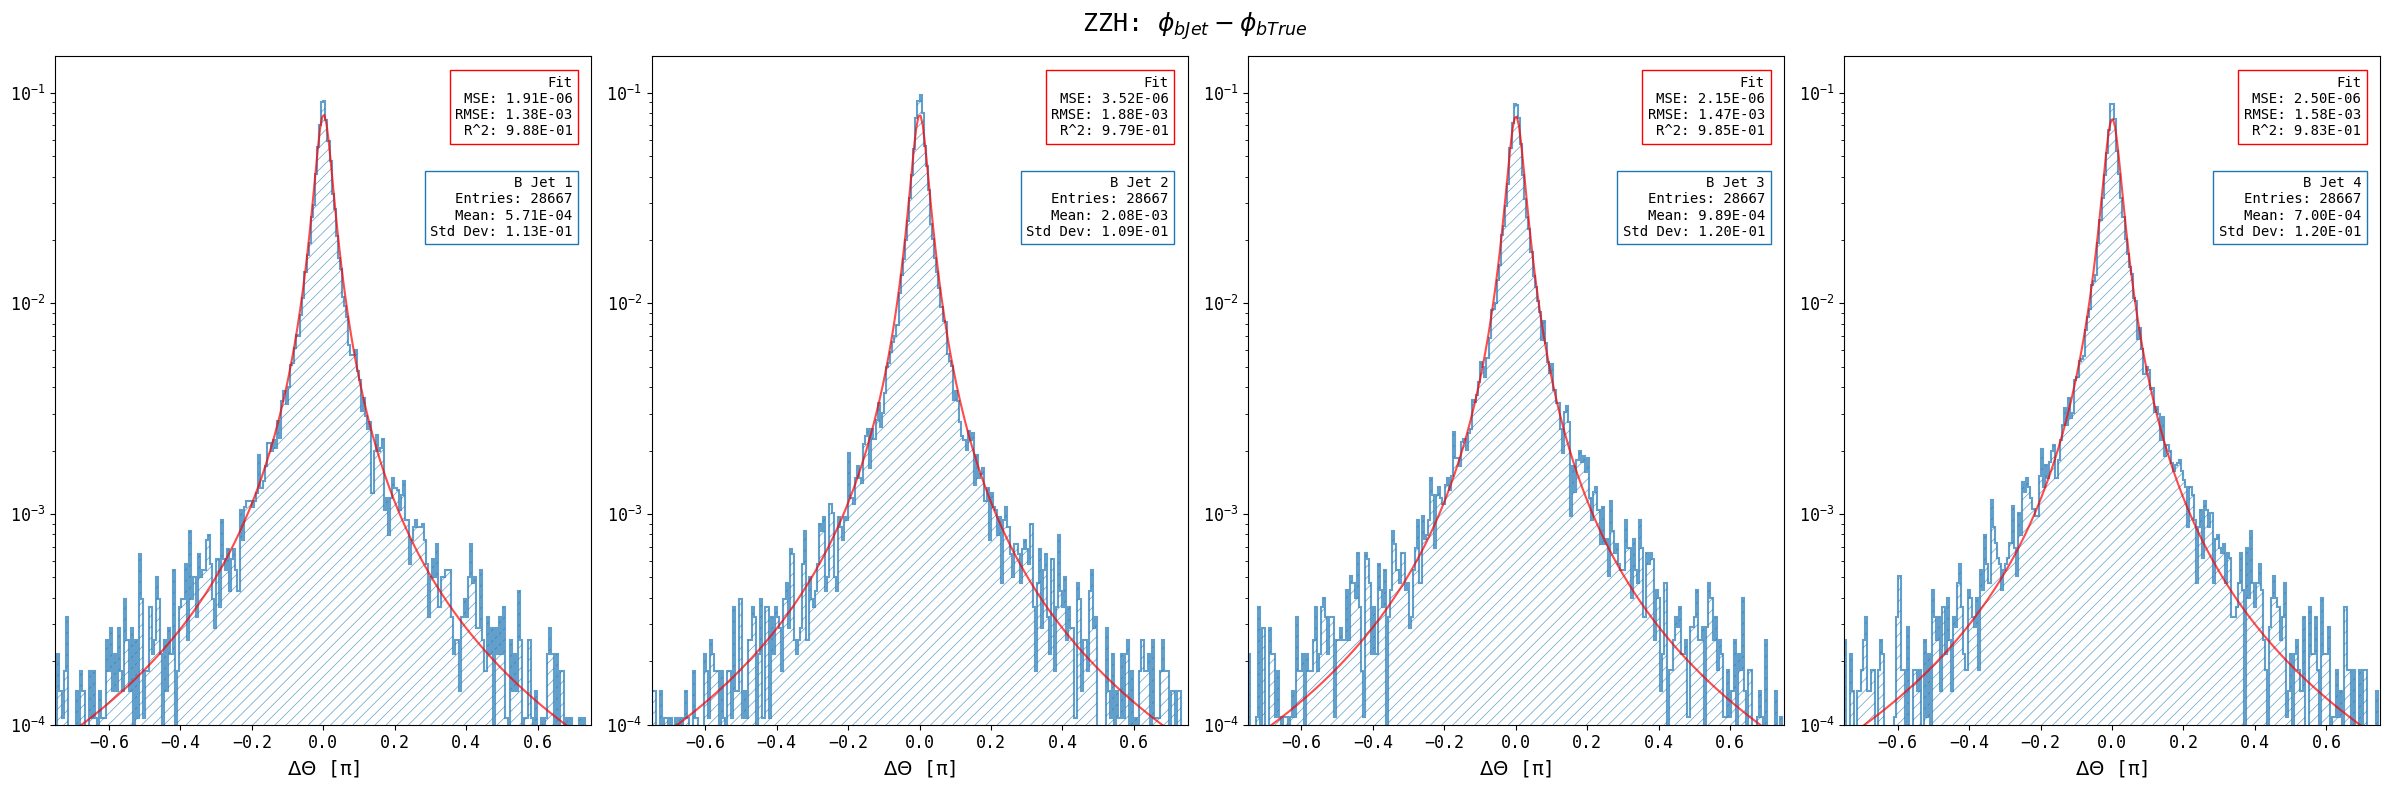

In [7]:
module_reload('analysis')
from typing import Optional
from analysis.plot_matplotlib import plot_hist
from analysis.transfer import plot_transfer
from analysis.fit_funcs import fit_funcs
from math import sqrt, pi

fit = 'lorentz' #"dbgauss_old"
figures = []
fitparams = []

for key in data:
    df = data[key]
    
    theta = { 'jet': [], 'parton': [] }
    phi   = { 'jet': [], 'parton': [] }
        
    for i in range(1, 5):
        for ptype in list(theta.keys()):
            theta[ptype].append(np.arccos(df[f"{ptype}{i}_pz"] / np.sqrt(df[f"{ptype}{i}_px"]**2 + df[f"{ptype}{i}_py"]**2 + df[f"{ptype}{i}_pz"]**2)))
            phi[ptype].append(np.arctan2(df[f"{ptype}{i}_py"], df[f"{ptype}{i}_px"]))
           
    # Filter nan 
    for ptype in list(theta.keys()):
        for i in range(len(theta[ptype])):
            theta[ptype][i] = np.array(theta[ptype][i])
            phi[ptype][i] = np.array(phi[ptype][i])

    for dt in (theta, phi):
        for i in range(len(theta[ptype])):
            mask = np.isnan(dt['jet'][i]) | np.isnan(dt['parton'][i])
            dt['jet'][i]    = dt['jet'][i][~mask]
            dt['parton'][i] = dt['parton'][i][~mask]
    
    j = 0
    for angle in (theta, phi):
        true = angle['parton']
        reco = angle['jet']
        quantity = r'\Theta' if j == 0 else r'\phi'
        
        figure, popts = plot_transfer([(reco[i], true[i]) for i in range(len(true))], f"{key.upper()}", fit=fit, quantity=quantity, xlabel=r"$\Delta\Theta$ [π]",
                                    true_label=r"b True", reco_label=r"b Jet", xlim=(-.75,.75), ylim=(0.0001, .15), n_bins=256, yscale="log",# titles=['Muon 1', 'Muon 2'],
                                    plot_args={ 'scientific_stats': True, 'xlim_binning': (-.75,.75) })
        j += 1
        
        for fig in figure: figures.append(fig)
        for popt in popts: fitparams.append(popt.tolist() if popt is not None else None)
        
export_figures(f'{repo_dir}/notebooks/results/2_jet_angles_sep.pdf', figures)
with open(f'{repo_dir}/notebooks/results/2_jet_angles_sep_fitparams.txt', 'w', encoding='utf-8') as file:
    json.dump(fitparams, file, ensure_ascii=False, indent=4)

[4.52782991e-05 1.88812338e-02]
[0.0004401  0.02488567]
[-8.45347055e-05  1.76423151e-02]
[0.00070152 0.02451234]


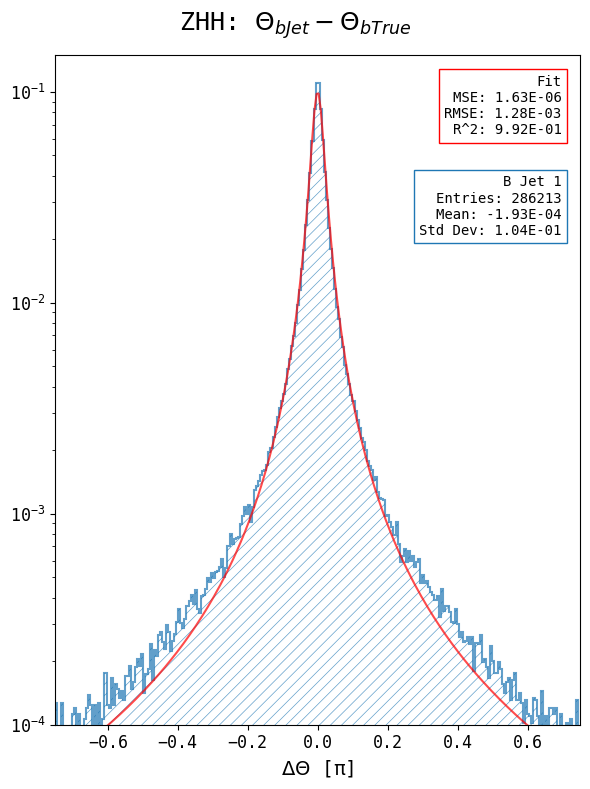

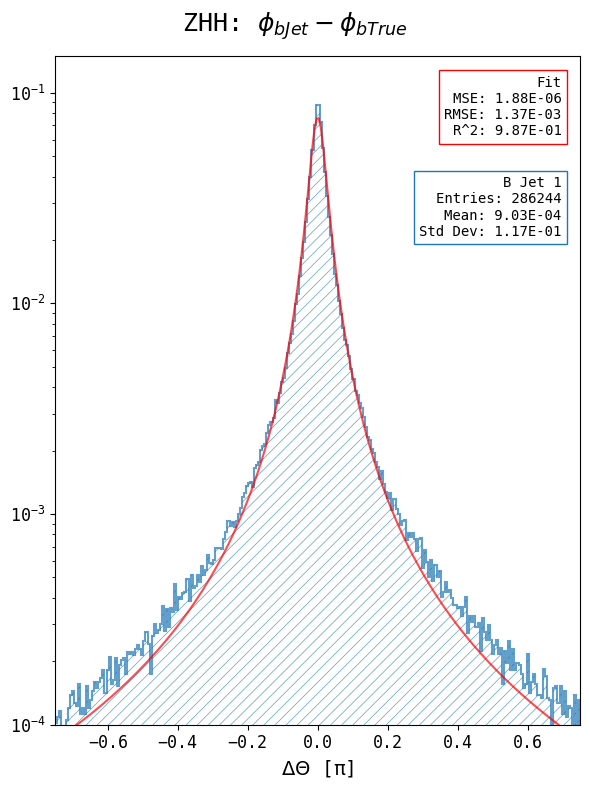

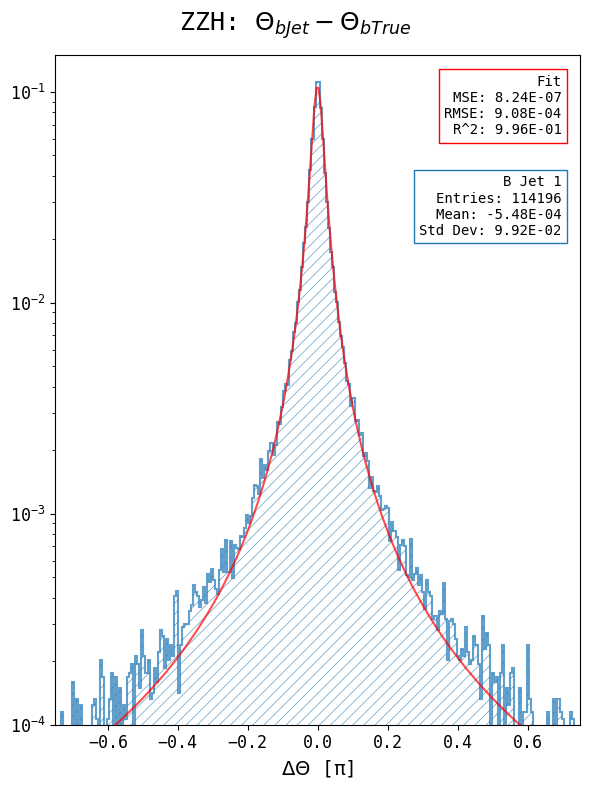

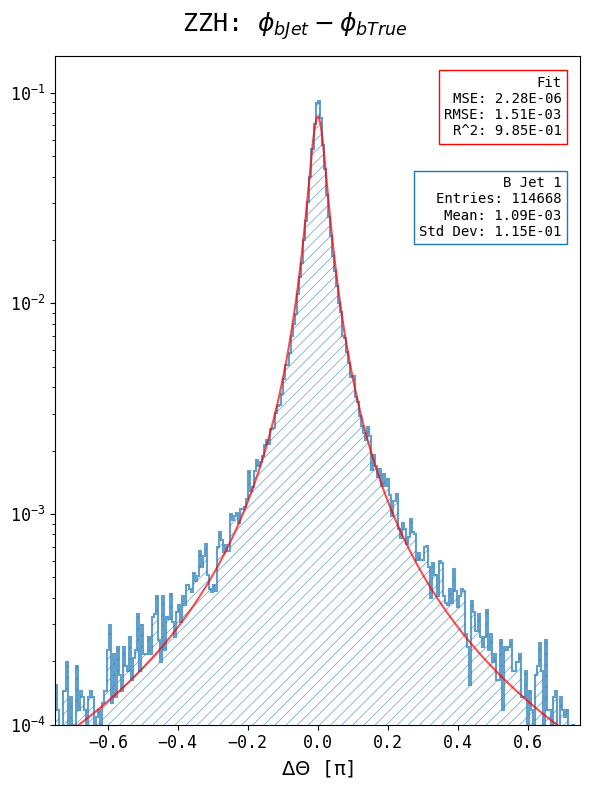

In [14]:
module_reload('analysis')
from typing import Optional
from analysis.plot_matplotlib import plot_hist
from analysis.transfer import plot_transfer
from analysis.fit_funcs import fit_funcs
from math import sqrt, pi

fit = 'lorentz' #"dbgauss_old"
figures = []
fitparams = []

for key in data:
    df = data[key]
    
    theta = { 'jet': [], 'parton': [] }
    phi   = { 'jet': [], 'parton': [] }
        
    for i in range(1, 5):
        for ptype in list(theta.keys()):
            theta[ptype].append(np.arccos(df[f"{ptype}{i}_pz"] / np.sqrt(df[f"{ptype}{i}_px"]**2 + df[f"{ptype}{i}_py"]**2 + df[f"{ptype}{i}_pz"]**2)))
            phi[ptype].append(np.arctan2(df[f"{ptype}{i}_py"], df[f"{ptype}{i}_px"]))
           
    # Filter nan 
    for ptype in list(theta.keys()):
        theta[ptype] = np.concatenate(theta[ptype])
        phi[ptype] = np.concatenate(phi[ptype])

    for dt in (theta, phi):
        mask = np.isnan(dt['jet']) | np.isnan(dt['parton'])
        dt['jet']    = dt['jet'][~mask]
        dt['parton'] = dt['parton'][~mask]
    
    j = 0
    for angle in (theta, phi):
        true = angle['parton']
        reco = angle['jet']
        quantity = r'\Theta' if j == 0 else r'\phi'
        
        figure, popts = plot_transfer([(reco, true)], f"{key.upper()}", fit=fit, quantity=quantity, xlabel=r"$\Delta\Theta$ [π]",
                                    true_label=r"b True", reco_label=r"b Jet", xlim=(-.75,.75), ylim=(0.0001, .15), n_bins=256, yscale="log",# titles=['Muon 1', 'Muon 2'],
                                    plot_args={ 'scientific_stats': True, 'xlim_binning': (-.75,.75) })
        
        for fig in figure: figures.append(fig)
        for popt in popts: fitparams.append(popt.tolist() if popt is not None else None)
        
        j += 1
                
export_figures(f'{repo_dir}/notebooks/results/2_jet_angles.pdf', figures)
with open(f'{repo_dir}/notebooks/results/2_jet_angles_fitparams.txt', 'w', encoding='utf-8') as file:
    json.dump(fitparams, file, ensure_ascii=False, indent=4)

Energy

[-0.72734567  3.33608014  0.57587273 -8.68248856 13.24898473]
[-0.2222661   3.23768205  0.54745647 -7.28026646 13.88148775]


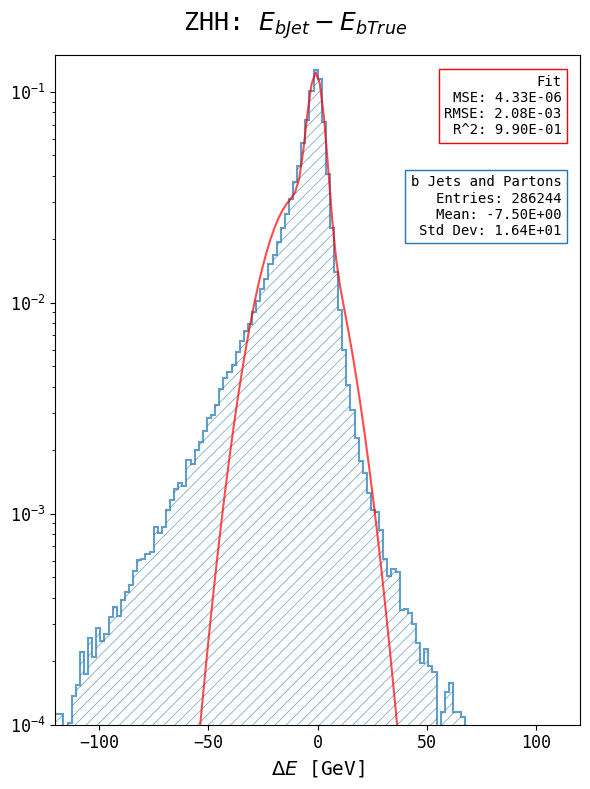

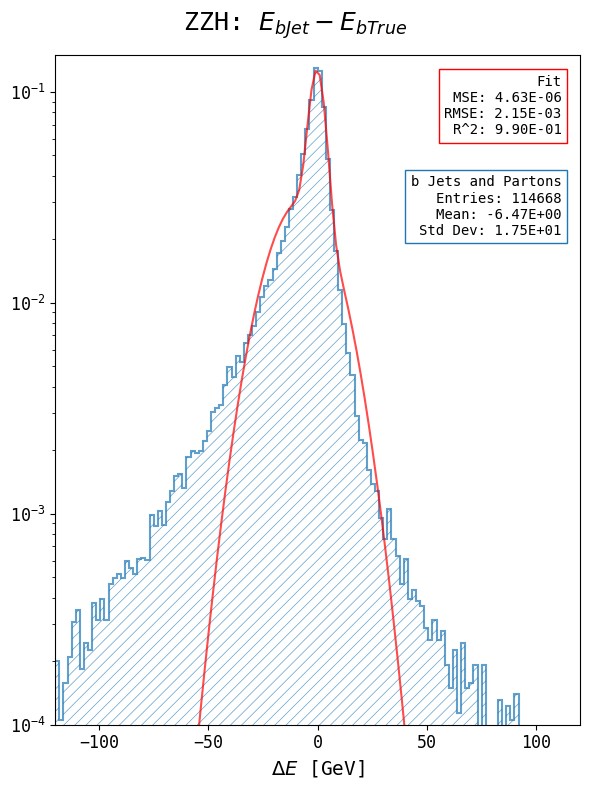

In [9]:
fit = "dbgauss_old"
figures = []
fitparams = []

for key in data:
    df = data[key]
    transfer_data_reco = []
    transfer_data_true = []
    
    for i in range(1, 5):
        transfer_data_reco.append(df[f"jet{i}_e"])
        transfer_data_true.append(df[f"parton{i}_e"])
    
    transfer_data_reco = np.array(transfer_data_reco).flatten()
    transfer_data_true = np.array(transfer_data_true).flatten()
    
    figure, popts = plot_transfer([(transfer_data_reco, transfer_data_true)], f"{key.upper()}", fit=fit, xlim=(-120, 120),
                  true_label=r"b True", reco_label=r"b Jet", ylim=(.0001, .15), yscale='log',
                  plot_args={ 'scientific_stats': True, 'x': 'b Jets and Partons', 'xlim_binning': (-120,120) });
    
    for fig in figure: figures.append(fig)
    for popt in popts: fitparams.append(popt.tolist() if popt is not None else None)
    
export_figures(f'{repo_dir}/notebooks/results/2_jet_energy_dbgauss.pdf', figures)
with open(f'{repo_dir}/notebooks/results/2_jet_energy_fitparams_dbgauss.txt', 'w', encoding='utf-8') as file:
    json.dump(fitparams, file, ensure_ascii=False, indent=4)

[-2.06144375  7.02980827]
[-1.23827345  6.77219787]


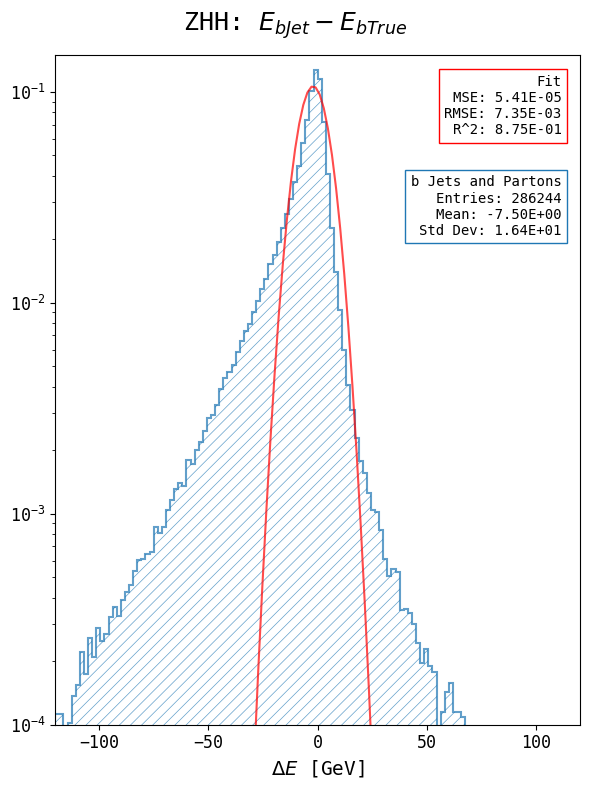

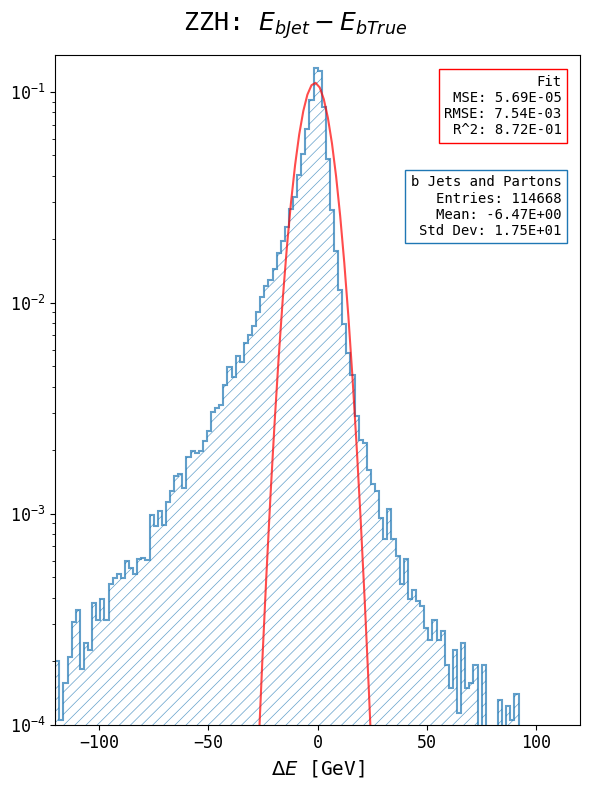

In [13]:
fit = "gauss"
figures = []
fitparams = []

for key in data:
    df = data[key]
    transfer_data_reco = []
    transfer_data_true = []
    
    for i in range(1, 5):
        transfer_data_reco.append(df[f"jet{i}_e"])
        transfer_data_true.append(df[f"parton{i}_e"])
    
    transfer_data_reco = np.array(transfer_data_reco).flatten()
    transfer_data_true = np.array(transfer_data_true).flatten()
    
    figure, popts = plot_transfer([(transfer_data_reco, transfer_data_true)], f"{key.upper()}", fit=fit, xlim=(-120, 120),
                  true_label=r"b True", reco_label=r"b Jet", ylim=(.0001, .15), yscale='log',
                  plot_args={ 'scientific_stats': True, 'x': 'b Jets and Partons', 'xlim_binning': (-120,120) });
    
    for fig in figure: figures.append(fig)
    for popt in popts: fitparams.append(popt.tolist() if popt is not None else None)
    
export_figures(f'{repo_dir}/notebooks/results/2_jet_energy_gauss.pdf', figures)
with open(f'{repo_dir}/notebooks/results/2_jet_energy_fitparams_gauss.txt', 'w', encoding='utf-8') as file:
    json.dump(fitparams, file, ensure_ascii=False, indent=4)

[-1.27822099  4.89207311]
[-0.63131867  4.70709048]


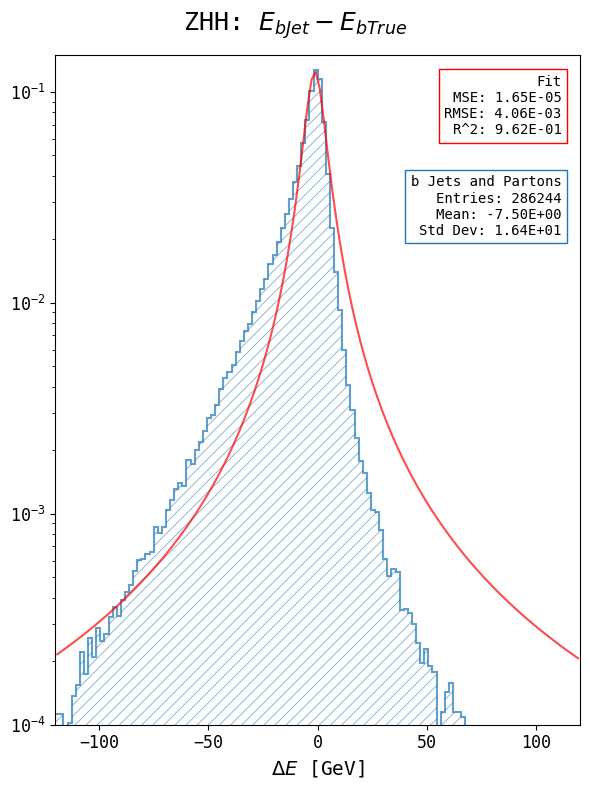

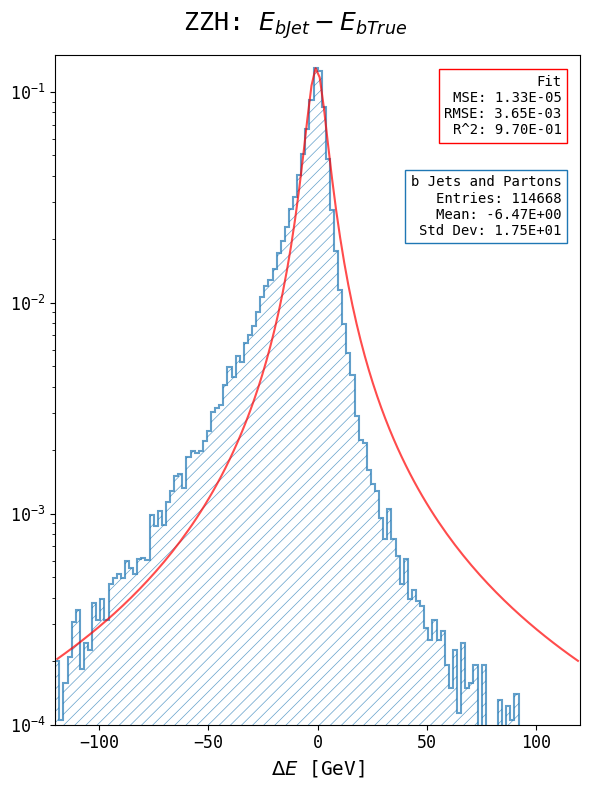

In [10]:
fit = "lorentz"
figures = []
fitparams = []

for key in data:
    df = data[key]
    transfer_data_reco = []
    transfer_data_true = []
    
    for i in range(1, 5):
        transfer_data_reco.append(df[f"jet{i}_e"])
        transfer_data_true.append(df[f"parton{i}_e"])
    
    transfer_data_reco = np.array(transfer_data_reco).flatten()
    transfer_data_true = np.array(transfer_data_true).flatten()
    
    figure, popts = plot_transfer([(transfer_data_reco, transfer_data_true)], f"{key.upper()}", fit=fit, xlim=(-120, 120),
                  true_label=r"b True", reco_label=r"b Jet", ylim=(.0001, .15), yscale='log',
                  plot_args={ 'scientific_stats': True, 'x': 'b Jets and Partons', 'xlim_binning': (-120,120) });
    
    for fig in figure: figures.append(fig)
    for popt in popts: fitparams.append(popt.tolist() if popt is not None else None)
    
export_figures(f'{repo_dir}/notebooks/results/2_jet_energy_lorentz.pdf', figures)
with open(f'{repo_dir}/notebooks/results/2_jet_energy_fitparams_lorentz.txt', 'w', encoding='utf-8') as file:
    json.dump(fitparams, file, ensure_ascii=False, indent=4)

[-0.75715294  3.34023314  0.57682179 -8.75115412 13.23864788]
[-0.68803474  3.29716545  0.58294666 -8.56324165 13.1965751 ]
[-0.74117618  3.33409255  0.57643611 -8.63475608 13.18084777]
[-0.67764134  3.27780582  0.57506074 -8.51893574 13.23477166]
SEPTF: A(1+2) : B(3+4)
[-0.72259384  3.31869929  0.57988423 -8.65719788 13.21761149]
[-0.70940876  3.30594918  0.57574842 -8.57684591 13.20780972]
[ 0.28877353  2.93632186 -0.52340065 -5.13033241 13.62332921]
[ 0.16631848  3.06514735 -0.50356591 -5.92809092 14.17580785]
[-0.70647308  3.32795255  0.58714463 -8.69509333 13.50706881]
[-0.71315197  3.3258336   0.59359475 -8.42734187 13.40493521]
SEPTF: A(1+2) : B(3+4)
[ 0.22754601  3.0007346  -0.51348328 -5.52921167 13.89956853]
[-0.70981253  3.32689308  0.59036969 -8.5612176  13.45600201]


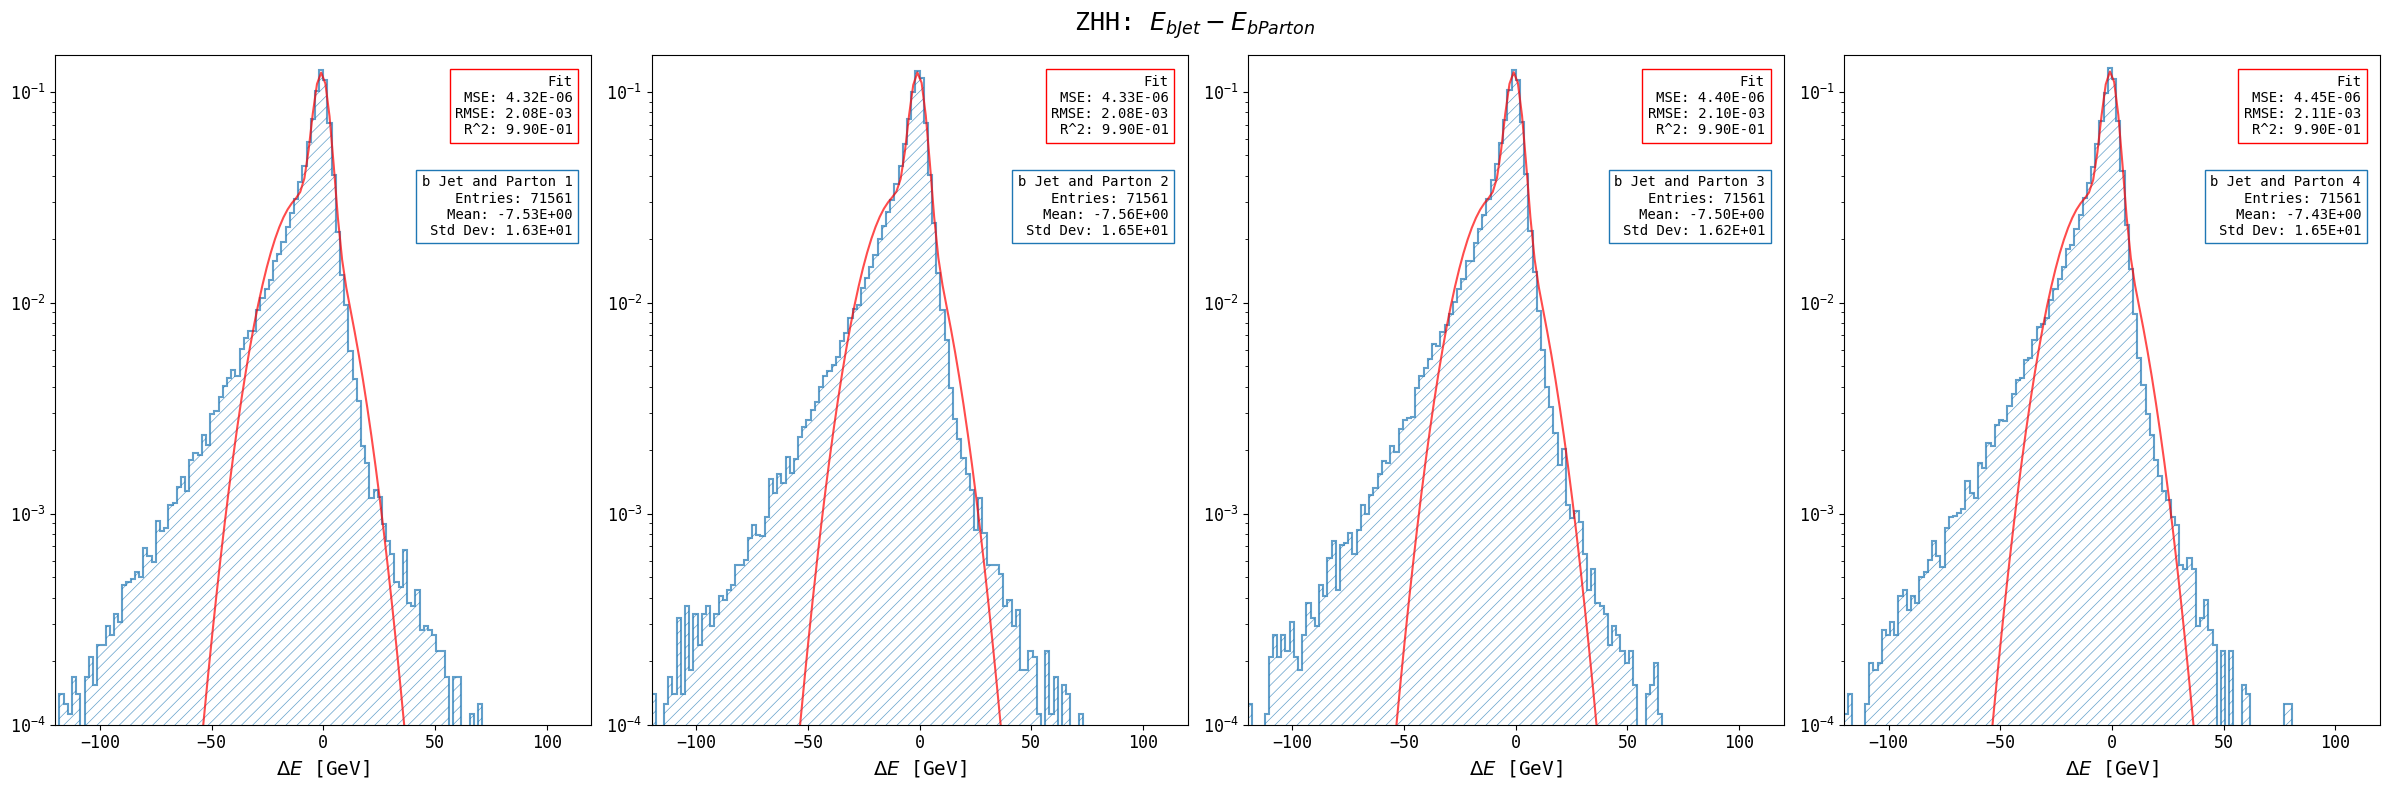

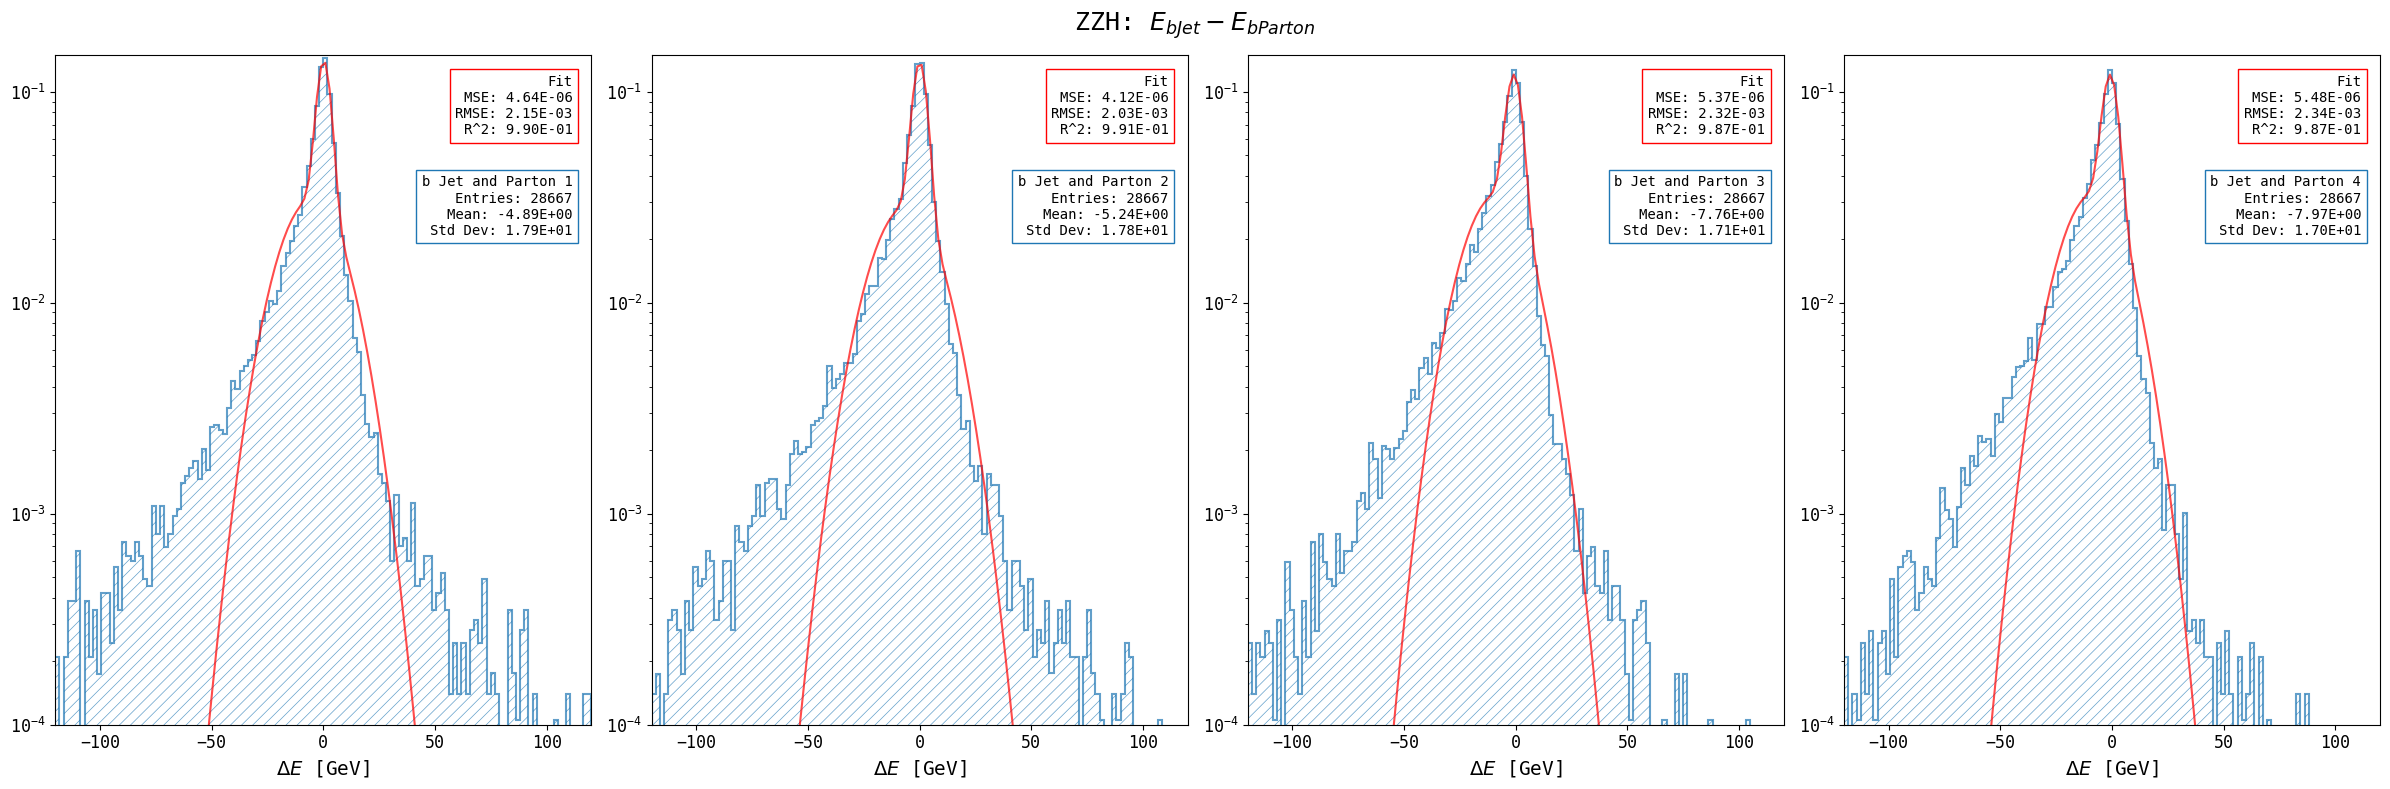

In [11]:
module_reload('analysis')
from analysis.import_data import import_true_reco
from analysis.plot_matplotlib import plot_hist, export_figures
from analysis.transfer import plot_transfer

fit = "dbgauss_old"
figures = []

for key in data:
    transfer_data = []
    df = data[key]
    
    for i in range(1, 5):
        transfer_data.append((df[f"jet{i}_e"], df[f"parton{i}_e"]))

    fig, popt = plot_transfer(transfer_data, f"{key.upper()}", fit=fit, true_label=r"b Parton", reco_label=r"b Jet",
                              ylim=(.0001, .15), xlim=(-120,120), yscale="log", titles=[f'b Jet and Parton {j}' for j in range(1,5)],
                              plot_args={ 'scientific_stats': True, 'xlim_binning': (-120,120), });
    
    for fig in figure: figures.append(fig)
    for popt in popts: fitparams.append(popt.tolist() if popt is not None else None)
    
export_figures(f'{repo_dir}/notebooks/results/2_jet_energy_sep.pdf', figures)
with open(f'{repo_dir}/notebooks/results/2_jet_energy_sep_fitparams.txt', 'w', encoding='utf-8') as file:
    json.dump(fitparams, file, ensure_ascii=False, indent=4)

Momentum

[ -2.77927815   3.20199927   0.60729872 -11.75331522  11.23448543]
[ -2.24688109   2.87889015   0.5671159  -10.41873088  11.44358937]


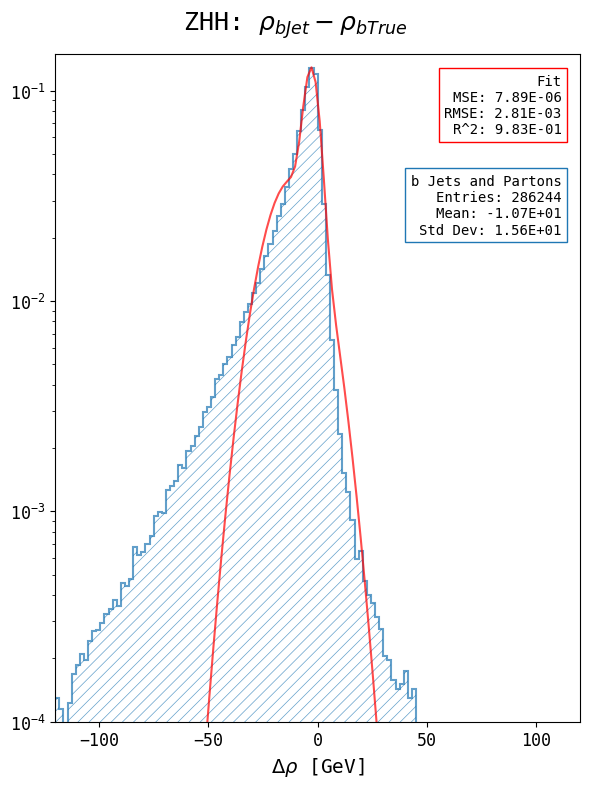

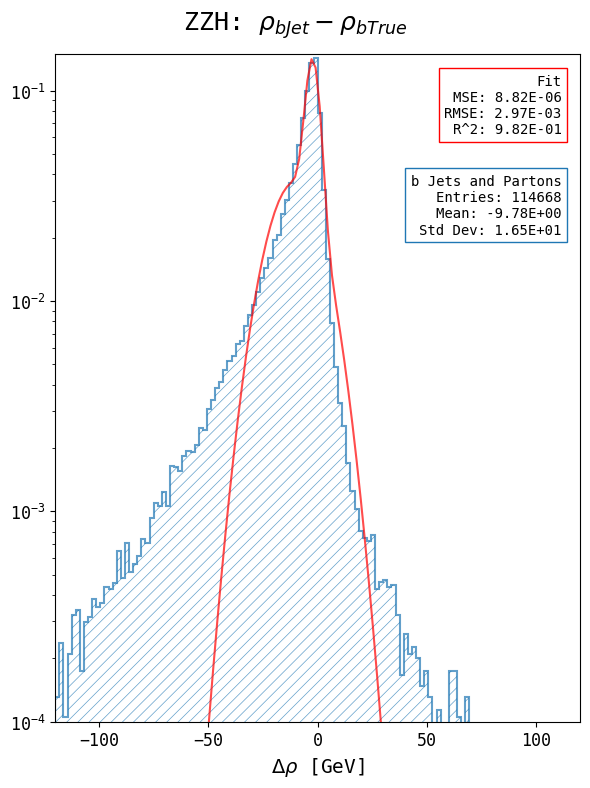

In [96]:
fit = "dbgauss_old"
figures = []
fitparams = []

for key in data:
    df = data[key]
    transfer_data_reco = []
    transfer_data_true = []
    
    for i in range(1, 5):
        transfer_data_reco.append(np.sqrt(df[f"jet{i}_px"]**2 + df[f"jet{i}_py"]**2 + df[f"jet{i}_pz"]**2))
        transfer_data_true.append(np.sqrt(df[f"parton{i}_px"]**2 + df[f"parton{i}_py"]**2 + df[f"parton{i}_pz"]**2))
    
    transfer_data_reco = np.array(transfer_data_reco).flatten()
    transfer_data_true = np.array(transfer_data_true).flatten()
    
    figure, popts = plot_transfer([(transfer_data_reco, transfer_data_true)], f"{key.upper()}", fit=fit, xlim=(-120, 120),
                  true_label=r"b True", reco_label=r"b Jet", ylim=(.0001, .15), yscale='log', quantity=r'\rho', xlabel=r'$\Delta \rho$ [GeV]',
                  plot_args={ 'scientific_stats': True, 'x': 'b Jets and Partons', 'xlim_binning': (-120,120) });
    
    for fig in figure: figures.append(fig)
    for popt in popts: fitparams.append(popt.tolist() if popt is not None else None)
    
export_figures(f'{repo_dir}/notebooks/results/2_jet_momentum.pdf', figures)
with open(f'{repo_dir}/notebooks/results/2_jet_momentum_fitparams.txt', 'w', encoding='utf-8') as file:
    json.dump(fitparams, file, ensure_ascii=False, indent=4)